# The scenario  will be as follows 
* Importing the libraries
* Data preparation 
* Data preprocessing
* Analysis data
* Split data
* Evaluate model
* Conclusion

# Importing the libraries


In [40]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score


# Data preparation


In [41]:
df = pd.read_csv("card_transdata.csv")

In [42]:
df.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


In [43]:
df.tail()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
999995,2.207101,0.112651,1.626798,1.0,1.0,0.0,0.0,0.0
999996,19.872726,2.683904,2.778303,1.0,1.0,0.0,0.0,0.0
999997,2.914857,1.472687,0.218075,1.0,1.0,0.0,1.0,0.0
999998,4.258729,0.242023,0.475822,1.0,0.0,0.0,1.0,0.0
999999,58.108125,0.318110,0.386920,1.0,1.0,0.0,1.0,0.0


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   distance_from_home              1000000 non-null  float64
 1   distance_from_last_transaction  1000000 non-null  float64
 2   ratio_to_median_purchase_price  1000000 non-null  float64
 3   repeat_retailer                 1000000 non-null  float64
 4   used_chip                       1000000 non-null  float64
 5   used_pin_number                 1000000 non-null  float64
 6   online_order                    1000000 non-null  float64
 7   fraud                           1000000 non-null  float64
dtypes: float64(8)
memory usage: 61.0 MB


In [45]:
# Creating a descriptive statistics table for data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
distance_from_home,1000000.0,26.628792,65.390784,0.004874,3.878008,9.967760,25.743985,10632.723672
distance_from_last_transaction,1000000.0,5.036519,25.843093,0.000118,0.296671,0.998650,3.355748,11851.104565
ratio_to_median_purchase_price,1000000.0,1.824182,2.799589,0.004399,0.475673,0.997717,2.096370,267.802942
repeat_retailer,1000000.0,0.881536,0.323157,0.000000,1.000000,1.000000,1.000000,1.000000
used_chip,1000000.0,0.350399,0.477095,0.000000,0.000000,0.000000,1.000000,1.000000
used_pin_number,1000000.0,0.100608,0.300809,0.000000,0.000000,0.000000,0.000000,1.000000
online_order,1000000.0,0.650552,0.476796,0.000000,0.000000,1.000000,1.000000,1.000000
fraud,1000000.0,0.087403,0.282425,0.000000,0.000000,0.000000,0.000000,1.000000


In [46]:
legit = df[df.fraud == 0]
fraud = df[df.fraud == 1]

In [47]:
print(legit.shape)
print(fraud.shape)
df['fraud'].value_counts()

(912597, 8)
(87403, 8)


0.0    912597
1.0     87403
Name: fraud, dtype: int64

As show there's imbalanced data.

## Data preprocessing

In [48]:
df.isnull().sum()
# or df.isna().sum()

distance_from_home                0
distance_from_last_transaction    0
ratio_to_median_purchase_price    0
repeat_retailer                   0
used_chip                         0
used_pin_number                   0
online_order                      0
fraud                             0
dtype: int64

In [49]:
# Check the sum of duplicate rows
print(f'# duplicate rows: {df.duplicated().sum()}')

# duplicate rows: 0


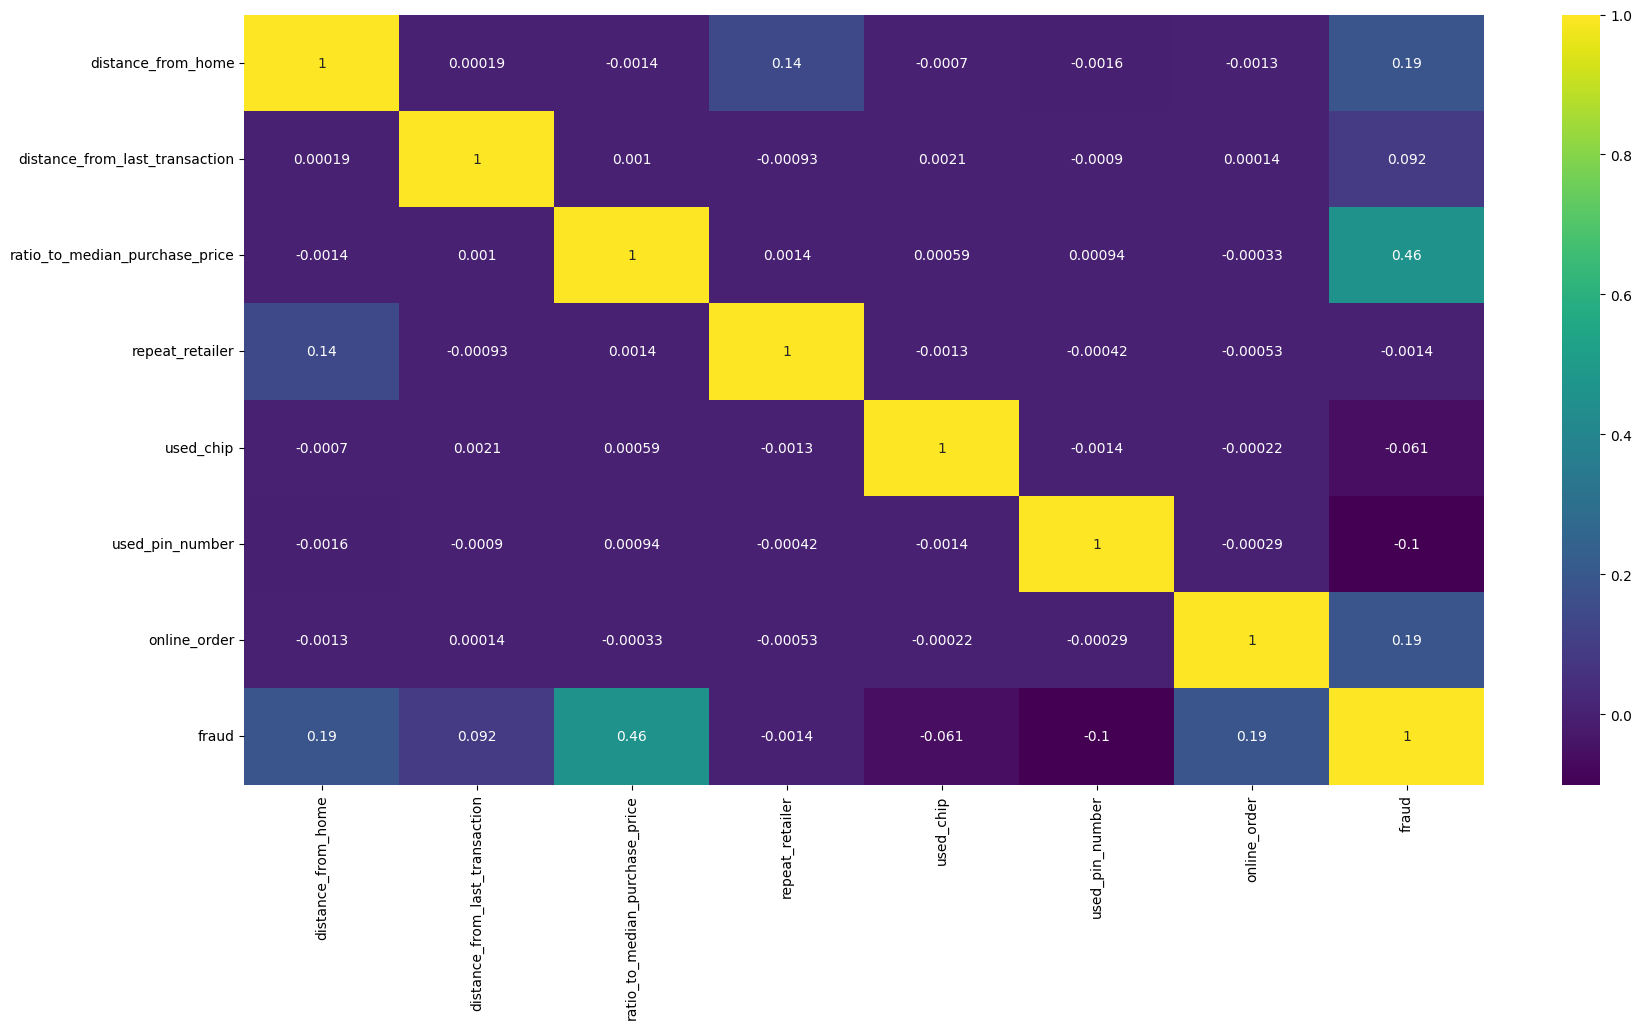

In [50]:
plt.figure(figsize = (20, 10))
sns.heatmap(df.corr(), annot = True, cmap='viridis')
plt.show()

### Handling outliers

In [51]:
print(f' The number of samples after removing outliers: {df.shape[0]}')

 The number of samples after removing outliers: 1000000


In [57]:
#List containing numerical features to remove outliers
num_features = ['distance_from_home', 'distance_from_last_transaction', 'ratio_to_median_purchase_price']

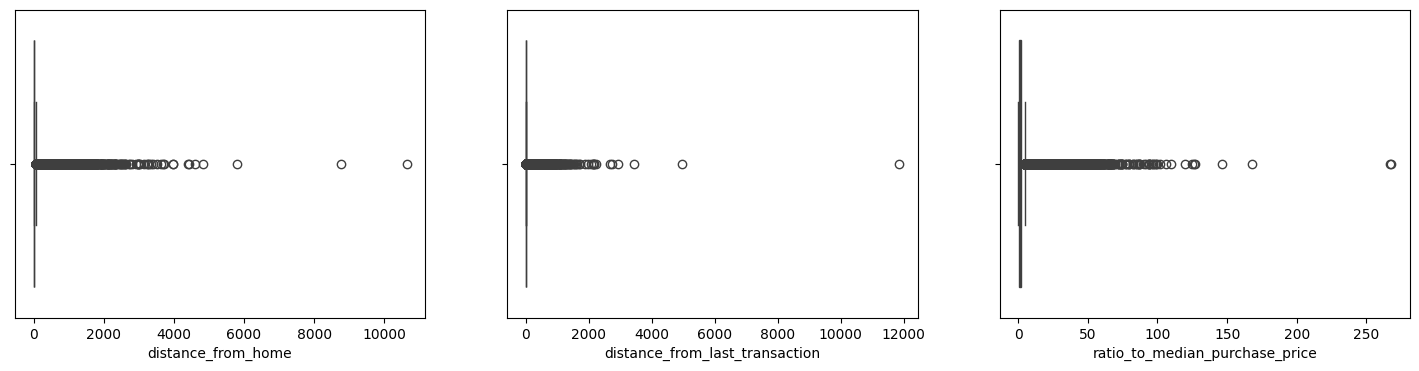

In [58]:
plt.figure(figsize = (18, 4))
for i, col in enumerate(num_features):
    plt.subplot(1, 3, i+1)
    sns.boxplot(data = df, x = col)
plt.show()

In [59]:
# Remove outliers
def remove_outliers(df, col):
    
    # 1st quartile (25%)
    Q1 = df[col].quantile(0.25)
    # 3rd quartile (75%)
    Q3 = df[col].quantile(0.75)
    
    # Interquartile range (IQR)
    IQR = Q3 - Q1    
    
    lower_bound = Q1 - (1.5 * IQR)
    upper_bound = Q3 + (1.5 * IQR)
    
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    
    return df

In [60]:
data_no_outliers = df.copy()
for col in num_features:
    data_no_outliers = remove_outliers(data_no_outliers, col)

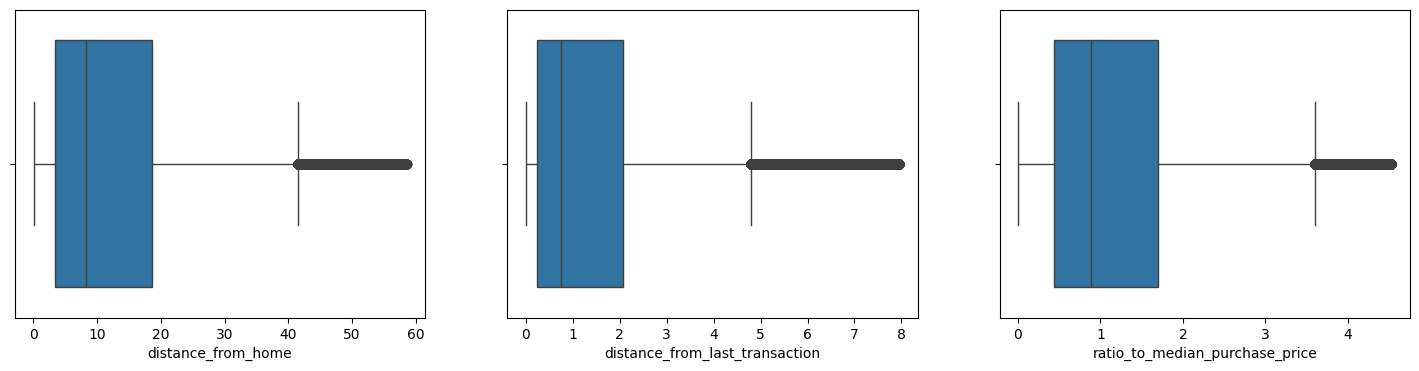

In [61]:
plt.figure(figsize = (18, 4))
for i, col in enumerate(num_features):
    plt.subplot(1, 3, i+1)
    sns.boxplot(data = data_no_outliers, x = col)
plt.show()

In [62]:
print(f' The number of samples after removing outliers: {data_no_outliers.shape[0]}')

 The number of samples after removing outliers: 718686


In [20]:
legit_no_outliers = data_no_outliers[data_no_outliers.fraud == 0]
fraud_no_outliers = data_no_outliers[data_no_outliers.fraud == 1]
print(legit_no_outliers.shape)
print(fraud_no_outliers.shape)

(709694, 8)
(8992, 8)


##  Splitting data

In [63]:
X = data_no_outliers.drop('fraud', axis = 1)
y = data_no_outliers['fraud']

# Splitting data to X_train, y_train, X_test, and y_test
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size = 0.3, random_state = 42)

In [64]:
print('X training shape = ', X_train.shape)
print('Y training shape = ', y_train.shape)
print('X test shape     = ', X_test.shape)
print('Y test shape     = ', y_test.shape)

X training shape =  (503080, 7)
Y training shape =  (503080,)
X test shape     =  (215606, 7)
Y test shape     =  (215606,)


#  Feature Scalling

In [23]:
scaler = StandardScaler()
# Fit the data
scaler.fit(X_train)

StandardScaler()

In [65]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Oversampling


In [25]:
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

In [26]:
# Count of each unique value in y_train
y_train.value_counts()

0.0    496786
1.0      6294
Name: fraud, dtype: int64

In [27]:
# Count of each unique value in y_train after using SMOTE
y_train_balanced.value_counts()

0.0    496786
1.0    496786
Name: fraud, dtype: int64

Undersampling


In [68]:
print(legit_no_outliers.shape[0])
print(fraud_no_outliers.shape[0])

709694
8992


In [69]:
legit_sample = legit_no_outliers.sample(n=fraud_no_outliers.shape[0])

In [70]:
legit_sample.value_counts()

distance_from_home  distance_from_last_transaction  ratio_to_median_purchase_price  repeat_retailer  used_chip  used_pin_number  online_order  fraud
0.046945            5.206241                        0.099037                        0.0              1.0        0.0              1.0           0.0      1
14.258146           2.809980                        0.689813                        1.0              1.0        0.0              1.0           0.0      1
14.221083           0.064301                        0.452271                        1.0              0.0        0.0              0.0           0.0      1
14.226937           0.039660                        0.960353                        1.0              1.0        0.0              1.0           0.0      1
14.234240           1.317556                        1.144367                        1.0              0.0        0.0              1.0           0.0      1
                                                                                 

In [71]:
print(legit_sample.shape[0])
print(fraud_no_outliers.shape[0])

8992
8992


In [72]:
X1 = legit_sample.drop('fraud', axis = 1)
y1 = legit_sample['fraud']

# Splitting data to X_train, y_train, X_test, and y_test
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, stratify = y1, test_size = 0.3, random_state = 42)

In [73]:
print('X training shape = ', X_train1.shape)
print('Y training shape = ', y_train1.shape)
print('X test shape     = ', X_test1.shape)
print('Y test shape     = ', y_test1.shape)

X training shape =  (6294, 7)
Y training shape =  (6294,)
X test shape     =  (2698, 7)
Y test shape     =  (2698,)


# Train

In [74]:
knn = KNeighborsClassifier(n_neighbors=5)

In [ ]:
knn.fit(X_train_balanced, y_train_balanced)

In [75]:
knn.fit(X_train1, y_train1)

KNeighborsClassifier()

# Predict

In [29]:
y_pred = knn.predict(X_test)

In [76]:
y_pred = knn.predict(X_test1)

In [77]:
# knn.score(X_test, y_test)
knn.score(X_test1, y_test1)

1.0

In [78]:
# scores = cross_val_score(knn, X_train_balanced, y_train_balanced, cv=5)
scores = cross_val_score(knn, X_train1, y_train1, cv=5)
print('Cross-validation scores:', scores)
print('Mean cross-validation score:', scores.mean())

Cross-validation scores: [1. 1. 1. 1. 1.]
Mean cross-validation score: 1.0


In [79]:
# pred = cross_val_predict(knn, X_test_scaled , y_test)
pred = cross_val_predict(knn, X_test1 , y_test1)
pred

array([0., 0., 0., ..., 0., 0., 0.])

In [80]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {'n_neighbors': [3, 5, 7, 9, 11]}

# Perform grid search cross-validation
grid_search = GridSearchCV(knn, param_grid, cv=5)
grid_search.fit(X_train1, y_train1)
# grid_search.fit(X_train_balanced, y_train_balanced)

# Print the best parameter and best score
print('Best parameter:', grid_search.best_params_)
print('Best score:', grid_search.best_score_)

Best parameter: {'n_neighbors': 3}
Best score: 1.0


In [81]:
from sklearn.metrics import accuracy_score

# Calculate accuracy on testing data
accuracy = accuracy_score(y_test1, y_pred)
print('Accuracy:', accuracy)

Accuracy: 1.0


In [82]:
from sklearn.metrics import confusion_matrix

# Calculate confusion matrix
cm = confusion_matrix(y_test1, y_pred)
print('Confusion matrix:')
print(cm)

Confusion matrix:
[[2698]]


In [83]:
from sklearn.metrics import roc_curve, roc_auc_score

# Calculate predicted probabilities for class 1
y_pred_prob = knn.predict_proba(X_test1)[:, 1]

# Calculate false positive rate, true positive rate, and threshold
fpr, tpr, thresholds = roc_curve(y_test1, y_pred_prob)

# Plot ROC curve
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

# Calculate the area under the ROC curve (AUC)
auc = roc_auc_score(y_test1, y_pred_prob)
print('AUC:', auc)

IndexError: index 1 is out of bounds for axis 1 with size 1

# conclusion
* We have developed 2 models to classify the problem of whether the card fraud or not.
    * 1- Knn.
    * 2- Linear Regression.

    ### Result